<a href="https://colab.research.google.com/github/ranjukhanal11/ranjukhanal11/blob/main/Quiz12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How many entries are there in the dataset**

select count(*) from bigquery-public-data.london_fire_brigade.fire_brigade_service_calls

32247 


**How many False Alarms happened between 10PM and 5 AM?**

select count(*) from bigquery-public-data.london_fire_brigade.fire_brigade_service_calls where incident_group = "False Alarm" and hour_of_call between 5 and 22

13513

**What is the average number of num_pumps_attending when there is a Fire?**

select avg(num_pumps_attending) from bigquery-public-data.london_fire_brigade.fire_brigade_service_calls where incident_group = "Fire"

1.63

**What is the largest number of num_pumps_attending to a Road Vehicle property_category**
select max(num_pumps_attending) from bigquery-public-data.london_fire_brigade.fire_brigade_service_calls where property_category = "Road Vehicle"

6

In [ ]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")

In [ ]:
len(html_soup.find_all('table'))

36

In [ ]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')

[<a href="#cite_note-99">[98]</a>, <a href="#cite_note-100">[99]</a>]

In [ ]:
df = pa.read_html(str(tables))[0]
df

,City,Unnamed: 1,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Oklahoma City,Avg. high,50 °F(10 °C),55 °F(13 °C),63 °F(17 °C),73 °F(23 °C),80 °F(27 °C),88 °F(31 °C),94 °F(34 °C),93 °F(34 °C),85 °F(29 °C),73 °F(23 °C),62 °F(17 °C),51 °F(11 °C)
1,Oklahoma City,Avg. low,29 °F(−2 °C),33 °F(1 °C),41 °F(5 °C),50 °F(10 °C),60 °F(16 °C),68 °F(20 °C),72 °F(22 °C),71 °F(22 °C),63 °F(17 °C),52 °F(11 °C),40 °F(4 °C),31 °F(−1 °C)
2,Tulsa,Avg. high,48 °F(9 °C),53 °F(12 °C),62 °F(17 °C),72 °F(22 °C),79 °F(26 °C),88 °F(31 °C),93 °F(34 °C),93 °F(34 °C),84 °F(29 °C),73 °F(23 °C),61 °F(16 °C),49 °F(9 °C)
3,Tulsa,Avg. low,27 °F(−3 °C),31 °F(−1 °C),40 °F(4 °C),49 °F(9 °C),59 °F(15 °C),68 °F(20 °C),73 °F(23 °C),71 °F(22 °C),62 °F(17 °C),51 °F(11 °C),40 °F(4 °C),30 °F(−1 °C)
4,Lawton,Avg. high,50 °F(10 °C),56 °F(13 °C),65 °F(18 °C),73 °F(23 °C),82 °F(28 °C),90 °F(32 °C),96 °F(36 °C),95 °F(35 °C),86 °F(30 °C),76 °F(24 °C),62 °F(17 °C),52 °F(11 °C)
5,Lawton,Avg. low,26 °F(−3 °C),31 °F(−1 °C),40 °F(4 °C),49 °F(9 °C),59 °F(15 °C),68 °F(20 °C),73 °F(23 °C),71 °F(22 °C),63 °F(17 °C),51 °F(11 °C),39 °F(4 °C),30 °F(−1 °C)


In [ ]:
rslt_df = df[df['City'] == 'Oklahoma City']

In [ ]:
rslt_df

,City,Unnamed: 1,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Oklahoma City,Avg. high,50 °F(10 °C),55 °F(13 °C),63 °F(17 °C),73 °F(23 °C),80 °F(27 °C),88 °F(31 °C),94 °F(34 °C),93 °F(34 °C),85 °F(29 °C),73 °F(23 °C),62 °F(17 °C),51 °F(11 °C)
1,Oklahoma City,Avg. low,29 °F(−2 °C),33 °F(1 °C),41 °F(5 °C),50 °F(10 °C),60 °F(16 °C),68 °F(20 °C),72 °F(22 °C),71 °F(22 °C),63 °F(17 °C),52 °F(11 °C),40 °F(4 °C),31 °F(−1 °C)


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df.rename( columns={'Unnamed: 1':'TempValue'}, inplace=True )

In [ ]:
df

,City,TempValue,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Oklahoma City,Avg. high,50 °F(10 °C),55 °F(13 °C),63 °F(17 °C),73 °F(23 °C),80 °F(27 °C),88 °F(31 °C),94 °F(34 °C),93 °F(34 °C),85 °F(29 °C),73 °F(23 °C),62 °F(17 °C),51 °F(11 °C)
1,Oklahoma City,Avg. low,29 °F(−2 °C),33 °F(1 °C),41 °F(5 °C),50 °F(10 °C),60 °F(16 °C),68 °F(20 °C),72 °F(22 °C),71 °F(22 °C),63 °F(17 °C),52 °F(11 °C),40 °F(4 °C),31 °F(−1 °C)
2,Tulsa,Avg. high,48 °F(9 °C),53 °F(12 °C),62 °F(17 °C),72 °F(22 °C),79 °F(26 °C),88 °F(31 °C),93 °F(34 °C),93 °F(34 °C),84 °F(29 °C),73 °F(23 °C),61 °F(16 °C),49 °F(9 °C)
3,Tulsa,Avg. low,27 °F(−3 °C),31 °F(−1 °C),40 °F(4 °C),49 °F(9 °C),59 °F(15 °C),68 °F(20 °C),73 °F(23 °C),71 °F(22 °C),62 °F(17 °C),51 °F(11 °C),40 °F(4 °C),30 °F(−1 °C)
4,Lawton,Avg. high,50 °F(10 °C),56 °F(13 °C),65 °F(18 °C),73 °F(23 °C),82 °F(28 °C),90 °F(32 °C),96 °F(36 °C),95 °F(35 °C),86 °F(30 °C),76 °F(24 °C),62 °F(17 °C),52 °F(11 °C)
5,Lawton,Avg. low,26 °F(−3 °C),31 °F(−1 °C),40 °F(4 °C),49 °F(9 °C),59 °F(15 °C),68 °F(20 °C),73 °F(23 °C),71 °F(22 °C),63 °F(17 °C),51 °F(11 °C),39 °F(4 °C),30 °F(−1 °C)


In [ ]:
rslt1_df = df[(df['City'] == 'Tulsa') & (df['TempValue'] == 'Avg. high')]

In [ ]:
rslt1_df

,City,TempValue,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
2,Tulsa,Avg. high,48 °F(9 °C),53 °F(12 °C),62 °F(17 °C),72 °F(22 °C),79 °F(26 °C),88 °F(31 °C),93 °F(34 °C),93 °F(34 °C),84 °F(29 °C),73 °F(23 °C),61 °F(16 °C),49 °F(9 °C)


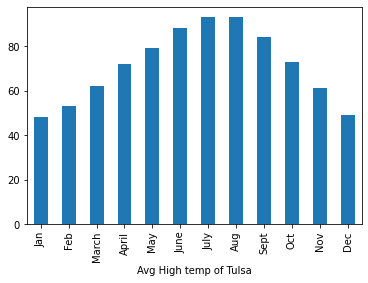

In [ ]:
import pandas as pd
d = {'columns': ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'],
     'data': [[48, 53, 62, 72, 79,	88, 93, 93, 84, 73, 61, 49]],
     'index': [1]}
df1 = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
df1.columns.names = ['Avg High temp of Tulsa']

row = df1.iloc[0]
row.plot(kind='bar')
plt.show()

In [ ]:
df2 = df.groupby('City').agg({'Jan':'max', 'Feb':'max', 'March':'max', 'April':'max', 'May':'max', 'June':'max', 'July':'max', 'Aug':'max', 'Sept':'max', 'Oct':'max', 'Nov':'max', 'Dec':'max'})

In [ ]:
df2

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
City,,,,,,,,,,,,
Lawton,50 °F(10 °C),56 °F(13 °C),65 °F(18 °C),73 °F(23 °C),82 °F(28 °C),90 °F(32 °C),96 °F(36 °C),95 °F(35 °C),86 °F(30 °C),76 °F(24 °C),62 °F(17 °C),52 °F(11 °C)
Oklahoma City,50 °F(10 °C),55 °F(13 °C),63 °F(17 °C),73 °F(23 °C),80 °F(27 °C),88 °F(31 °C),94 °F(34 °C),93 °F(34 °C),85 °F(29 °C),73 °F(23 °C),62 °F(17 °C),51 °F(11 °C)
Tulsa,48 °F(9 °C),53 °F(12 °C),62 °F(17 °C),72 °F(22 °C),79 °F(26 °C),88 °F(31 °C),93 °F(34 °C),93 °F(34 °C),84 °F(29 °C),73 °F(23 °C),61 °F(16 °C),49 °F(9 °C)
